In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from fanalysis.mca import MCA

# Étape 1
## Lecture des données

In [ ]:
df = pd.read_excel("./Chiens.xlsx", header=0, index_col=0, engine = 'openpyxl')
display(df.head(50))
print(df.info())

,Taille,Velocite,Affection,Cote,Fonction
Chien,,,,,
Beauceron,Taille++,Veloc++,Affec+,2.0,utilite
Basset,Taill-,Velo-,Affe-,4.5,chasse
Berger All,Taille++,Veloc++,Affec+,2.5,utilite
Boxer,Taille+,Veloc+,Affec+,3.0,compagnie
Bull-Dog,Taill-,Velo-,Affec+,1.5,compagnie
Bull-Mastif,Taille++,Velo-,Affe-,1.0,utilite
Caniche,Taill-,Veloc+,Affec+,4.0,compagnie
Labrador,Taille+,Veloc+,Affec+,3.5,chasse


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Beauceron to Labrador
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Taille     8 non-null      object 
 1   Velocite   8 non-null      object 
 2   Affection  8 non-null      object 
 3   Cote       8 non-null      float64
 4   Fonction   8 non-null      object 
dtypes: float64(1), object(4)
memory usage: 384.0+ bytes
None


Il y a 8 individus. Nous nous concentrons uniquement sur les variables `Taille`, `Velocite` et `Affection`, qui sont toutes de type qualitatives ordinales.

In [ ]:
df.drop(columns=["Cote", "Fonction"], inplace=True)

# Étape 2
## Représentation des données sous la forme d'un tableau disjonctif (TDC)

In [ ]:
tdc = pd.get_dummies(df)
display(tdc)

,Taille_Taill-,Taille_Taille+,Taille_Taille++,Velocite_Velo-,Velocite_Veloc+,Velocite_Veloc++,Affection_Affe-,Affection_Affec+
Chien,,,,,,,,
Beauceron,0,0,1,0,0,1,0,1
Basset,1,0,0,1,0,0,1,0
Berger All,0,0,1,0,0,1,0,1
Boxer,0,1,0,0,1,0,0,1
Bull-Dog,1,0,0,1,0,0,0,1
Bull-Mastif,0,0,1,1,0,0,1,0
Caniche,1,0,0,0,1,0,0,1
Labrador,0,1,0,0,1,0,0,1


$m$ : nombre de modalités;

$p$ : nombre de variables;

$n$ : nombre d'individus.

$m_1 = 3, m_2=3$ et $m_3=2 \rightarrow m = 8$

$p = 3$

$n = 8$

In [ ]:
m = tdc.shape[1]
n = df.shape[0]
p = df.shape[1]

# Étape 3
## Déterminer le profile (patron) moyen c
## $c = (\dots, \frac {n_s} {np}, \dots) \rightarrow$ vecteur des poids des modalités

In [ ]:
np = n * p
ns_vect = tdc.sum()

c = ns_vect / np
c.name = "c"
print(c)

Taille_Taill-       0.125000
Taille_Taille+      0.083333
Taille_Taille++     0.125000
Velocite_Velo-      0.125000
Velocite_Veloc+     0.125000
Velocite_Veloc++    0.083333
Affection_Affe-     0.083333
Affection_Affec+    0.250000
Name: c, dtype: float64


# Étape 4
## Déterminer la matrice des profils-lignes et la matrice des profils-colonnes
## $M_{profils-ligne} = \frac {k_{is}} {p}, M_{profils-colonnes} = \frac {k_{is}} {ns}$

In [ ]:
M_profils_lignes = tdc / p

display(M_profils_lignes.append(c))

,Taille_Taill-,Taille_Taille+,Taille_Taille++,Velocite_Velo-,Velocite_Veloc+,Velocite_Veloc++,Affection_Affe-,Affection_Affec+
Chien,,,,,,,,
Beauceron,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333
Basset,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000
Berger All,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333
Boxer,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
Bull-Dog,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333
Bull-Mastif,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000
Caniche,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
Labrador,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
c,0.125000,0.083333,0.125000,0.125000,0.125000,0.083333,0.083333,0.250000


## $r = (\dots, \frac {1} {n}, \dots) \rightarrow$ vecteur des poids des individus

In [ ]:
M_profils_colonnes = tdc / ns_vect

display(M_profils_colonnes.assign(r = 1/n))

,Taille_Taill-,Taille_Taille+,Taille_Taille++,Velocite_Velo-,Velocite_Veloc+,Velocite_Veloc++,Affection_Affe-,Affection_Affec+,r
Chien,,,,,,,,,
Beauceron,0.000000,0.0,0.333333,0.000000,0.000000,0.5,0.0,0.166667,0.125
Basset,0.333333,0.0,0.000000,0.333333,0.000000,0.0,0.5,0.000000,0.125
Berger All,0.000000,0.0,0.333333,0.000000,0.000000,0.5,0.0,0.166667,0.125
Boxer,0.000000,0.5,0.000000,0.000000,0.333333,0.0,0.0,0.166667,0.125
Bull-Dog,0.333333,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.166667,0.125
Bull-Mastif,0.000000,0.0,0.333333,0.333333,0.000000,0.0,0.5,0.000000,0.125
Caniche,0.333333,0.0,0.000000,0.000000,0.333333,0.0,0.0,0.166667,0.125
Labrador,0.000000,0.5,0.000000,0.000000,0.333333,0.0,0.0,0.166667,0.125


# Étape 5
## Analyse du nombre de facteurs principaux à retenir
On garde au plus $r = m-p$ axes factoriels (le nombre de valeurs propres non nulles).

Une première approches est de garder les valeurs propres $\lambda_q$ telles qu'elles sont supérieures à la moyenne $\frac{1}{p}$. C'est la règle de Kaiser.

In [ ]:
r = m - p
print("Nombre de facteurs à retenir:", r)

Nombre de facteurs à retenir: 5


In [ ]:
mca = MCA(row_labels = tdc.index.values, var_labels = df.columns.values)
mca.fit(df.to_numpy())

MCA(row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Labrador'], dtype=object),
    var_labels=array(['Taille', 'Velocite', 'Affection'], dtype=object))

L'attribut `.eig_` contient :

- en 1ère ligne : les valeurs propres en valeur absolue
- en 2ème ligne : les valeurs propres en pourcentage de la variance totale
- en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [ ]:
pd.DataFrame(mca.eig_.round(2), index = ["Valeur propre", "%", "Cumul %"], columns=range(1,6))

,1,2,3,4,5
Valeur propre,0.71,0.59,0.26,0.07,0.04
%,42.48,35.49,15.72,4.18,2.12
Cumul %,42.48,77.97,93.69,97.88,100.00


On doit retenir les facteurs principaux tels que $\lambda_i \gt \frac{1}{p} \rightarrow \lambda_i \gt \frac {1}{3} = 0.33$. Si l'on regarde le tableau précédent, alors on retiendrait les 2 premiers facteurs principaux. Avec ces deux là, il ne reste plus que 22% de variance non expliquée.

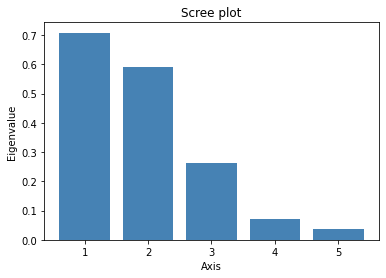

In [ ]:
mca.plot_eigenvalues()

Si l'on y va plutôt selon la règle de Coude, alors on opterait pour 2 ou 3 facteurs principaux. En effet, si l'on en retient 3, alors la variance totale cumulée monte à près de 94% !

Pour obtenir une indication plus réaliste sur la qualité des facteurs, on peut utiliser la correction de Benzécri:
$$\hat{\lambda}_k = \left [ \left ( \frac{p}{p-1} \right ) \left ( \lambda_k - \frac{1}{p} \right ) \right ] ^2$$

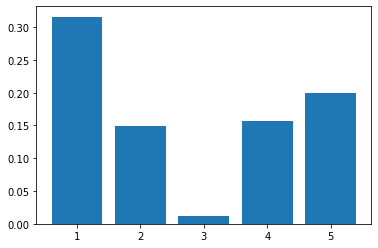

In [ ]:
corrected_eigenvalues = list(map(lambda l_k: ((p/(p-1)) * (l_k-(1/p))) ** 2, mca.eig_[0]))
plt.bar(range(1,6), corrected_eigenvalues)
plt.show()

On peut voir que les facteurs principaux n'ont plus les mêmes poids!

# Étape 6
## Déterminer la contribution des individus aux 2 premiers axes factoriels
## $Ctr_\alpha(i) = \frac{1}{n}\cdot\frac{x^2_{i\alpha}}{\lambda_\alpha}$
On peut obtenir la contribution des individus directement à partir de l'attribut `.row_contrib_` qui est calculé automatiquement lors du `fit()`. Sinon, pour faire le calcul à la main, on peut obtenir les coordonnées factorielles des individus avec l'attribut `.row_coord_`.

,1
Chien,
Basset,2.337985e+01
Bull-Mastif,2.337985e+01
Boxer,2.337985e+01
Labrador,2.337985e+01
Bull-Dog,3.240293e+00
Caniche,3.240293e+00
Berger All,1.665737e-28
Beauceron,7.888609e-29


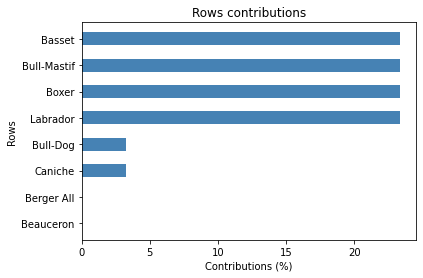

,2
Chien,
Beauceron,34.620365
Berger All,34.620365
Basset,13.493329
Caniche,5.489722
Bull-Dog,5.489722
Boxer,3.134479
Labrador,3.134479
Bull-Mastif,0.017539


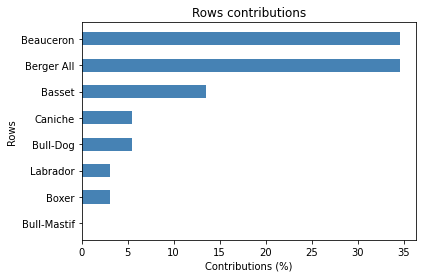

In [ ]:
for i in range(2):
    display(pd.DataFrame(mca.row_contrib_.T[i].T, index=df.index, columns=range(i+1,i+2)).sort_values(by=i+1,ascending=False))
    mca.plot_row_contrib(num_axis=i+1)

Pour le premier axe factoriel, ce sont Basset, Bull-Mastif, Boxer et Labrador qui contribuent le plus avec une part égale. Les autres n'ont pas un grand impact sur la variance. Quant au deuxième axe, ce sont Beauceron et Berger All qui ont la plus grande contribution, ensuite ça décroit rapidement. Basset a une contribution intermédiaire, alors ue les autres races de chien n'apportent pratiquement rien à l'inertie.

# Étape 7
## Déterminer la contribution des variables aux 2 premiers axes factoriels
## $Ctr_\alpha(s) = \frac{n_s}{np}\cdot\frac{y^2_{s\alpha}}{\lambda_\alpha}$
Encore une fois, on peut obtenir la contribution des variables directement à partir de l'attribut `.col_contrib_`.

,1
Affection_Affe-,2.201396e+01
Taille_Taille+,2.201396e+01
Velocite_Velo-,2.064806e+01
Velocite_Veloc+,2.064806e+01
Affection_Affec+,7.337985e+00
Taille_Taill-,3.668993e+00
Taille_Taille++,3.668993e+00
Velocite_Veloc++,1.630107e-28


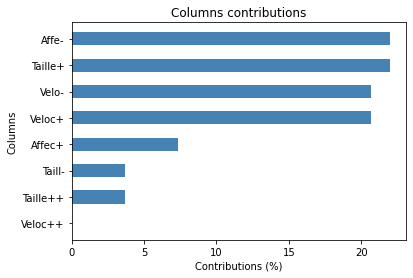

,2
Velocite_Veloc++,39.020556
Taille_Taille++,26.602515
Taille_Taill-,13.126725
Velocite_Veloc+,6.503426
Velocite_Velo-,6.503426
Taille_Taille+,3.532865
Affection_Affe-,3.532865
Affection_Affec+,1.177622


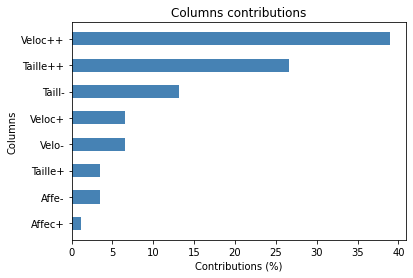

In [ ]:
for i in range(2):
    display(pd.DataFrame(mca.col_contrib_.T[i].T, index=tdc.columns, columns=range(i+1,i+2)).sort_values(by=i+1,ascending=False))
    mca.plot_col_contrib(num_axis=i+1)

- La contribution d’une modalité $s$ à un axe dépend de sa fréquence $n_s$.

Donc, pour le premier axe, `Affe-`, `Taille+`, `Velo-` et `Veloc+` sont les modalités qui ont la plus grande fréquence, et donc ce sont celles qui contribuent le plus à l'inertie. Le deuxième axe est davantage défini par `Veloc++`, `Taille++` et `Tail-` dans une moindre mesure.

# Étape 8
## Représenter graphiquement les variables et les individus sur un même graphique

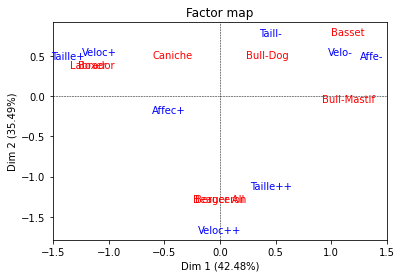

In [ ]:
mca.mapping(num_x_axis=1, num_y_axis=2)

Sur le graphique, on peut observer des clusters. D'abord on peut établir des ressemblance entre certains individus ainsi que les distances qui les séparent, comme `Berger All` et `Beauceron` (qui ont donc des caractéristiques similaires), mais on peut aussi établir des liens entre les modalités. Par exemple, `Taille++` et `Veloc++` sont corrélées.

Le plus intéressant par contre, c'est la superposition sur le plan factoriel et des individus, et des modalité, ce qui permet de voir quelles modalités sont rattachées à quels individus. Pour reprendre [`Berger All` et `Beauceron`] et [`Taille++` et `Veloc++`], on peut dire que ces races de chien partagent ces modalités.

# Étape 9
## Déterminer à quelle race ressemble le nouvel individu

In [ ]:
indSupp = pd.read_excel("./Chiens.xlsx", header=0, index_col=0, engine = 'openpyxl', sheet_name="Feuil2")
display(indSupp)

,Taille,Velocite,Affection
Chien,,,
Levrier,Taille++,Veloc++,Affe-


In [ ]:
coords = mca.transform(indSupp.to_numpy())

Nous avons les coordonées de la projection du nouvel individu. Pour voir à quelle race de chien il ressemble, nous allons calculer la différence entre ses coordonées factorielles avec celles autres individus.

In [ ]:
diffs = numpy.array(list(map(lambda ind: abs(ind-coords), mca.row_coord_))).reshape(8,5)

display(pd.DataFrame(diffs.T[0].T, index=df.index, columns=range(1,2)).sort_values(by=1))
display(pd.DataFrame(diffs.T[1].T, index=df.index, columns=range(2,3)).sort_values(by=2))

,1
Chien,
Bull-Dog,0.293952
Bull-Mastif,0.428414
Basset,0.428414
Beauceron,0.722366
Berger All,0.722366
Caniche,1.150779
Labrador,1.873145
Boxer,1.873145


,2
Chien,
Berger All,0.289382
Beauceron,0.289382
Bull-Mastif,0.961734
Boxer,1.375667
Labrador,1.375667
Bull-Dog,1.500218
Caniche,1.500218
Basset,1.789600


 On constate que l'individu le plus proche sur le premier axe est `Bull-Dog`, alors que sur le deuxième axe, il s'agit de `Beauceron` et `Berger All` à égalité (on se souvient qu'ils ont les mêmes coordonnées factorielles). On pourrait aussi projeter `Levrier` avec les autres races de chiens sur le plan factoriel.

[ 0.72236576 -0.99054221]


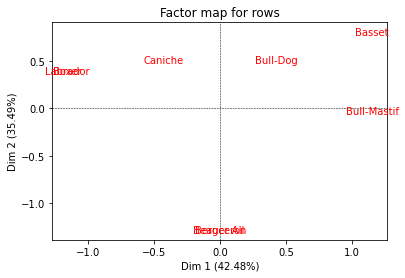

In [ ]:
print(coords.ravel()[:2])
mca.mapping_row(num_x_axis=1, num_y_axis=2,)

En imaginant la position du point, nous arrivons à la même conclusion.

Je ne sais pas s'il faut plutôt utiliser "Distance du $\chi^2$ entre deux individus $\rightarrow d^2(i,i')$"